In [1]:
import numpy as np
import pandas as pd
from datetime import datetime, timedelta
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
np.random.seed(42)

# Portfolio Planner

In this activity, you will use the iexfinance api to grab historical data for a 60/40 portfolio using `SPY` to represent the stock portion and `AGG` to represent the bonds.

In [3]:
# THESE NEXT TWO CELLS ARE GOING TO BE COMMENTED OUT SO THAT WE 
# DON'T PULL TOO MANY TIMES FROM IEX. I WROTE THE DATA INTO A CSV
# AND AM GOING TO JUST PULL THAT FOR THIS WORK.

# from iexfinance.stocks import get_historical_data
# import iexfinance as iex

# Data Collection

In this step, you will need to use the IEX api to fetch closing prices for the `SPY` and `AGG` tickers. Save the results as a pandas DataFrame

In [4]:
# list_of_tickers = ["SPY", "AGG"]
# end_date = datetime.now()
# start_date = end_date + timedelta(-365)
# closing_prices = pd.DataFrame(get_historical_data(list_of_tickers, start_date, end_date, output_format='pandas'))

In [5]:
# closing_prices.to_csv('~/Fintech/Homework/Learning-APIs/portfolio_planner.csv')

In [6]:
closing_prices_path = ('../Learning-APIs/portfolio_planner.csv')

In [7]:
closing_prices_csv = pd.read_csv(closing_prices_path,header=1)
closing_prices_csv.head()

,Unnamed: 0,open,high,low,close,volume,open.1,high.1,low.1,close.1,volume.1
0,date,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2019-01-22,264.82,265.06,261.06,262.86,115531183.0,106.44,106.62,106.44,106.44,6823956.0
2,2019-01-23,264.01,264.79,260.66,263.41,86030287.0,106.38,106.59,106.37,106.55,3222846.0
3,2019-01-24,263.21,264.20,262.08,263.55,59204139.0,106.72,106.84,106.67,106.73,7308898.0
4,2019-01-25,265.61,266.70,263.66,265.78,96883358.0,106.64,106.70,106.56,106.68,3469453.0


In [8]:
closing_prices_csv.drop(columns=['open','high','low','volume','open.1','high.1','low.1','volume.1'],inplace=True)
closing_prices_csv.rename(columns={'Unnamed: 0':'Date','close':'SPY','close.1':'AGG'},inplace=True)
closing_prices_csv.drop([0], axis=0, inplace=True)
closing_prices_csv.set_index(['Date'],inplace=True)
closing_prices_csv.head()

,SPY,AGG
Date,,
2019-01-22,262.86,106.44
2019-01-23,263.41,106.55
2019-01-24,263.55,106.73
2019-01-25,265.78,106.68
2019-01-28,263.76,106.62


# Monte Carlo Simulation

In this step, you will run Monte Carlo Simulations for your portfolio to model portfolio performance at different retirement ages. 

Complete the following steps:
1. Calculate the daily returns for the SPY and AGG closing prices.
2. Calculate volatility for both the SPY and AGG closing prices.
3. Find the last day's closing price for both stocks and save those as variables.
4. Run a Monte Carlo Simulation of at least 500 iterations and generate at least 30 years of closing prices

### HINTS:
There are 252 trading days per year, so the number of records to generate for each Monte Carlo run will be 252 days * 30 years

In [9]:
daily_returns=closing_prices_csv.pct_change()
daily_returns.head()

,SPY,AGG
Date,,
2019-01-22,NaN,NaN
2019-01-23,0.002092,0.001033
2019-01-24,0.000531,0.001689
2019-01-25,0.008461,-0.000468
2019-01-28,-0.007600,-0.000562


In [10]:
avg_daily_return=daily_returns.mean()
avg_daily_return

SPY    0.000961
AGG    0.000243
dtype: float64

In [11]:
std_dev_daily_returns = daily_returns.std()
std_dev_daily_returns

SPY    0.007402
AGG    0.002085
dtype: float64

In [12]:
# Save the last day's closing price
last_price = closing_prices_csv.iloc[-1]
last_price

SPY    331.95
AGG    113.05
Name: 2020-01-17, dtype: float64

In [13]:
last_price = pd.DataFrame(last_price)
last_price.rename(columns={'2020-01-17':'2020-01-17'},inplace=True)
last_price

,2020-01-17
SPY,331.95
AGG,113.05


In [14]:
print(f'SPY last price occurred on 1-17-20 and was {last_price.iloc[0][-1]}')

SPY last price occurred on 1-17-20 and was 331.95


In [15]:
# Setup the Monte Carlo Parameters
number_simulations = 500
number_records = 252 * 30

In [16]:
simulated_SPY=last_price.iloc[0][-1]
type(simulated_SPY)

numpy.float64

In [17]:
# Run the Monte Carlo Simulation
simulated_prices=pd.DataFrame({'sim_SPY':[],'sim_AGG':[]})
portfolio_cum_returns=pd.DataFrame()

for x in range(number_simulations):
    
    
    simulated_SPY=[last_price.iloc[0][-1]]
    simulated_AGG=[last_price.iloc[1][-1]]
    
    
    for i in range(number_records):
        simulated_SPY_price=simulated_SPY[-1]*(1+np.random.normal(avg_daily_return[0],std_dev_daily_returns[0]))
        simulated_AGG_price=simulated_AGG[-1]*(1+np.random.normal(avg_daily_return[1],std_dev_daily_returns[1]))
        
        simulated_SPY.append(simulated_SPY_price)
        simulated_AGG.append(simulated_AGG_price)
        
    simulated_prices["sim_SPY"] = pd.Series(simulated_SPY)
    simulated_prices['sim_AGG'] = pd.Series(simulated_AGG)
    
    simulated_daily_returns = simulated_prices.pct_change()
    
    weights = [.60,.40]
    
    portfolio_daily_returns = simulated_daily_returns.dot(weights)
    
    portfolio_cum_returns[x] = (1+portfolio_daily_returns.fillna(0)).cumprod()

portfolio_cum_returns.head()

,0,1,2,3,4,5,6,7,8,9,...,490,491,492,493,494,495,496,497,498,499
0,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
1,1.002765,0.996222,0.993929,0.999896,1.005468,1.006505,1.008854,0.996870,1.001856,0.999339,...,1.002160,0.996121,1.006918,1.000176,0.997978,1.003057,0.996650,0.994530,1.003012,0.997636
2,1.007598,1.000038,0.993478,0.999056,1.008655,0.998236,1.003838,0.987116,1.001268,1.007326,...,1.004317,1.003128,1.009988,1.001913,0.999475,1.000177,0.996370,0.995111,1.003086,1.001348
3,1.007033,1.000251,0.996933,0.993854,1.008206,1.001209,1.007665,0.981654,1.001242,1.015214,...,1.004537,1.005779,1.014524,1.003520,0.993478,0.999223,1.000070,1.000454,1.006429,1.000479
4,1.015419,1.003153,0.993831,0.999488,1.009844,0.996768,1.006748,0.979196,1.008793,1.006011,...,1.006454,1.004336,1.013382,1.008449,0.999416,0.996601,0.994983,1.001323,1.010826,1.003931


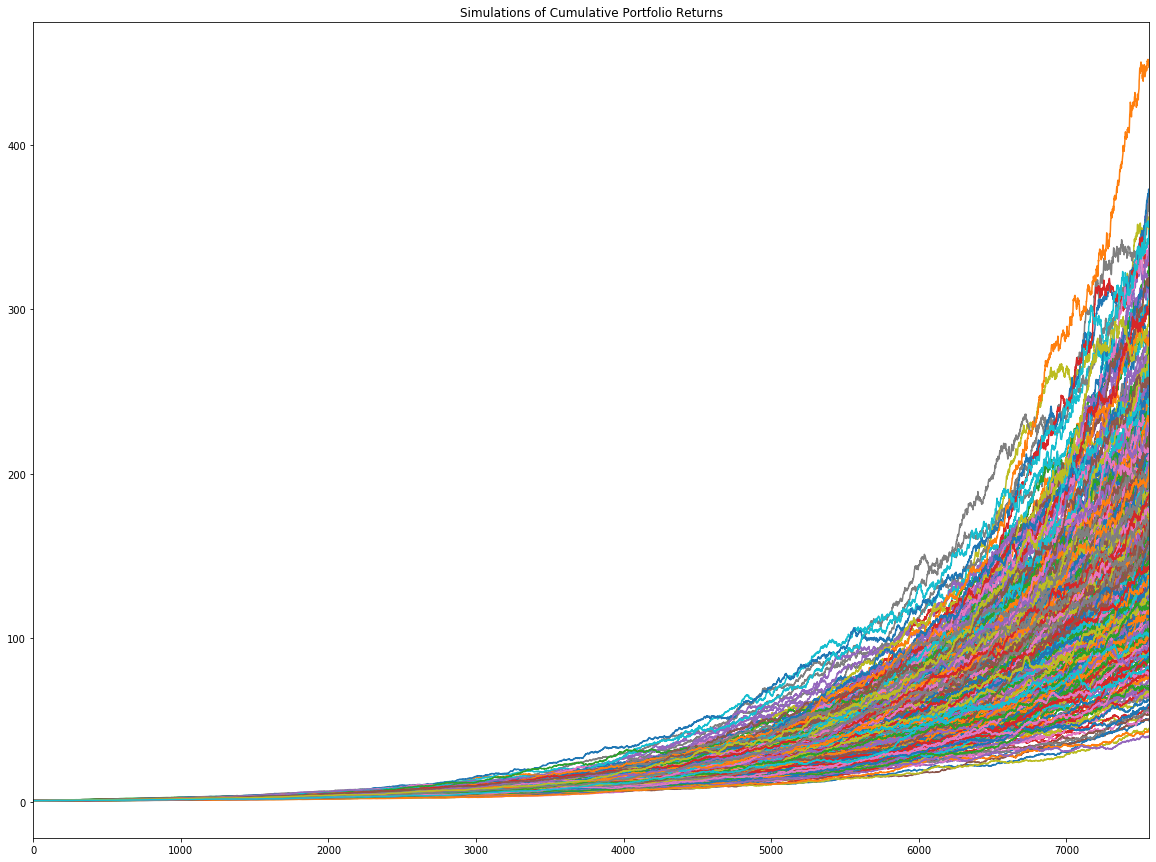

In [47]:
# Visualize the Simulation
portfolio_cum_returns.plot(legend=None,title=f'Simulations of Cumulative Portfolio Returns',figsize=(20,15))

In [49]:
# Select the last row for the cumulative returns 
# (cumulative returns at 30 years)
sim_cum_30 = portfolio_cum_returns.iloc[-1,:]
sim_cum_30.head()

0    172.632754
1    143.860225
2    193.515796
3    202.454611
4    185.436230
Name: 7560, dtype: float64

In [24]:
# Select the last row for the cumulative returns 
# (cumulative returns at 20 years)
sim_cum_20 = portfolio_cum_returns.iloc[-10,:]
sim_cum_20.head()

0    170.426581
1    143.830456
2    186.024525
3    199.931916
4    189.017759
Name: 7551, dtype: float64

In [68]:
type(sim_cum_20)

pandas.core.frame.DataFrame

In [29]:
# Display the 90% confidence interval for the ending returns
confidence_interval_30=sim_cum_30.quantile(q=[.05,.90])
confidence_interval_30

0.05     75.651312
0.90    237.622657
Name: 7560, dtype: float64

In [31]:
confidence_interval_20=sim_cum_20.quantile(q=[.05,.90])
confidence_interval_20

0.05     75.487181
0.90    237.440189
Name: 7551, dtype: float64

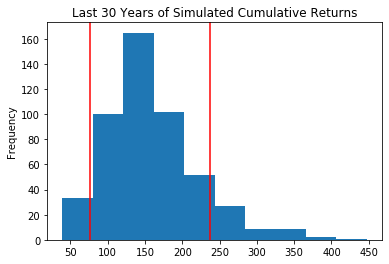

In [33]:
plt.figure();
sim_cum_30.plot(kind='hist',bins=10,title='Last 30 Years of Simulated Cumulative Returns')
plt.axvline(confidence_interval_30.iloc[0], color='r')
plt.axvline(confidence_interval_30.iloc[1], color='r')

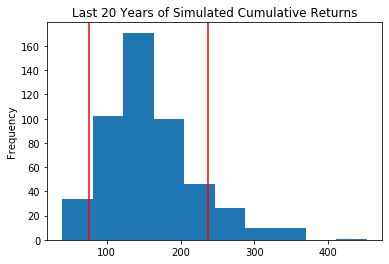

In [34]:
plt.figure();
sim_cum_20.plot(kind='hist',bins=10,title='Last 20 Years of Simulated Cumulative Returns')
plt.axvline(confidence_interval_20.iloc[0], color='r')
plt.axvline(confidence_interval_20.iloc[1], color='r')

---

# Retirement Analysis

In this section, you will use the monte carlo model to answer the following retirement planning questions:

1. What are the expected cumulative returns at 30 years for the 10th, 50th, and 90th percentiles?
2. Given an initial investment of `$20,000`, what is the expected portfolio return in dollars at the 10th, 50th, and 90th percentiles?
3. Given the current projected annual income from the Plaid analysis, will a 4% withdraw rate from the retirement portfolio meet or exceed that value at the 10th percentile?
4. How would a 50% increase in the initial investment amount affect the 4% retirement withdrawal?

### What are the expected cumulative returns at 30 years for the 10th, 50th, and 90th percentiles?

In [43]:
Fiftieth=round(sim_cum_30.mean(),2)
print(f'The expected cumulative returns at 30 years for the 10th percentile is ${round(confidence_interval_30.iloc[0],2)}'+
        f', the expected cumulative returns at 30 years for the 50th percentile is ${Fiftieth}'+
        f', and the expected cumulative returns at 30 years for the 90th percentile is ${round(confidence_interval_30.iloc[1],2)}.')

The expected cumulative returns at 30 years for the 10th percentile is $75.65, the expected cumulative returns at 30 years for the 50th percentile is $159.63, and the expected cumulative returns at 30 years for the 90th percentile is $237.62.


### Given an initial investment of `$20,000`, what is the expected portfolio return in dollars at the 10th, 50th, and 90th percentiles?

In [46]:
# Set initial investment
initial_investment = 20000

# Calculate investment profit/loss of lower and upper bound cumulative portfolio returns
investment_pnl_lower_bound = initial_investment + (initial_investment * round(confidence_interval_30.iloc[0],2))
investment_pnl_upper_bound = initial_investment + (initial_investment * round(confidence_interval_30.iloc[1],2))
investment_pnl_middle_bound = initial_investment + (initial_investment * Fiftieth)
                                                    
# Print the results
print(f"With a ${initial_investment} initial investment,"
      f" the expected cumulative returns at 30 years for the 10th percentile is ${investment_pnl_lower_bound},"
      f" The expected cumulative returns at 30 years for the 50th percentile is ${investment_pnl_middle_bound},"
      f" The expected cumulative returns at 30 years for the 90th percentile is ${investment_pnl_upper_bound}.")

With a $20000 initial investment, the expected cumulative returns at 30 years for the 10th percentile is $1533000.0, The expected cumulative returns at 30 years for the 50th percentile is $3212600.0, The expected cumulative returns at 30 years for the 90th percentile is $4772400.0.


### Given the current projected annual income from the Plaid analysis, will a 4% withdraw rate from the retirement portfolio meet or exceed that value at the 10th percentile?

Note: This is effectively saying that 90% of the expected returns will be greater than the return at the 10th percentile, so this can help measure the uncertainty about having enough funds at retirement

In [59]:
withdraw=pd.DataFrame(sim_cum_30)
withdraw.rename(columns={7560:'Prices'},inplace=True)

In [72]:
deduction=[]
rate=.04
for i in withdraw['Prices']:
    deducted_income=rate*i
    deduction.append(deducted_income)
df = pd.DataFrame({'Deducted_Price':deduction,'Income':350.00})
df.head()
Total = df['Deducted_Price'].sum() + df['Income'].sum()


In [73]:
if Total < investment_pnl_lower_bound:
    print(f'A {rate*100}% is a solid annual deduction amount from the retirement portfolio, because a {rate*100}% deduction results in {round(investment_pnl_lower_bound,2)-round(Total,2)}. ')
elif Total > investment_pnl_lower_bound:
    print(f'A {rate*100}% is a NOT solid annual deduction amount from the retirement portfolio because a {rate*100}% deduction results in {round(investment_pnl_lower_bound,2)-round(Total,2)}.')
elif Total == investment_pnl_lower_bound:
    print(f'A {rate*100}% is moot. Keep your money in the acct in case it grows, because a {rate*100}% deduction results in {round(investment_pnl_lower_bound,2)-round(Total,2)}.')

A 4.0% is a solid annual deduction amount from the retirement portfolio, because a 4.0% deduction results in 1354807.49. 


### How would a 50% increase in the initial investment amount affect the 4% retirement withdrawal?

In [74]:
# Set initial investment
initial_investment2 = initial_investment*1.5

# Calculate investment profit/loss of lower and upper bound cumulative portfolio returns
investment_pnl_lower_bound2 = initial_investment2 + (initial_investment2 * round(confidence_interval_30.iloc[0],2))
investment_pnl_upper_bound2 = initial_investment2 + (initial_investment2 * round(confidence_interval_30.iloc[1],2))
investment_pnl_middle_bound2 = initial_investment2 + (initial_investment2 * Fiftieth)

In [75]:
if Total < investment_pnl_lower_bound2:
    print(f'A {rate*100}% is a solid annual deduction amount from the retirement portfolio, because a {rate*100}% deduction results in {round(investment_pnl_lower_bound2,2)-round(Total,2)}. ')
elif Total > investment_pnl_lower_bound2:
    print(f'A {rate*100}% is a NOT solid annual deduction amount from the retirement portfolio because a {rate*100}% deduction results in {round(investment_pnl_lower_bound2,2)-round(Total,2)}.')
elif Total == investment_pnl_lower_bound2:
    print(f'A {rate*100}% is moot. Keep your money in the acct in case it grows, because a {rate*100}% deduction results in {round(investment_pnl_lower_bound2,2)-round(Total,2)}.')

A 4.0% is a solid annual deduction amount from the retirement portfolio, because a 4.0% deduction results in 2121307.49. 


### Optional Challenge

In this section, you will calculate and plot the cumulative returns for the median and 90% confidence intervals. This plot shows the expected cumulative returns for any given day between the first day and the last day of investment. 

In [ ]:
# YOUR CODE HERE